## Graduate Admission Prediction using ANN

> **Importing Module**

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Loading DataSet**

In [36]:
Data=pd.read_csv('admission_data.csv')

In [37]:
Data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [38]:
Data.shape

(500, 8)

In [39]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [40]:
Data.duplicated().sum()

0

In [41]:
X=Data.iloc[:,0:-1]
y=Data.iloc[:,-1]

In [42]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [55]:
y

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
495,0.87
496,0.96
497,0.93
498,0.73


**Spliting**

In [64]:
from sklearn.model_selection import train_test_split

X_train,X_text,y_train,y_test=train_test_split(X,y ,test_size=0.2 , random_state=1)

In [65]:
X_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
304,313,106,2,2.5,2.0,8.43,0
340,312,107,3,3.0,3.0,8.46,1
47,339,119,5,4.5,4.0,9.70,0
67,316,107,2,3.5,3.5,8.64,1
479,325,110,4,4.5,4.0,8.96,1
...,...,...,...,...,...,...,...
11,327,111,4,4.0,4.5,9.00,1
192,322,114,5,4.5,4.0,8.94,1
92,298,98,2,4.0,3.0,8.03,0
221,316,110,3,3.5,4.0,8.56,0


**Model Creation**


In [66]:
from sklearn.preprocessing import MinMaxScaler
Scaler= MinMaxScaler()

X_test_scaled=Scaler.fit_transform(X_test)
X_train_scaled=Scaler.fit_transform(X_train)

In [68]:
X_test_scaled

array([[0.46      , 0.48      , 0.25      , 0.375     , 0.25      ,
        0.44140625, 0.        ],
       [0.44      , 0.52      , 0.5       , 0.5       , 0.5       ,
        0.453125  , 1.        ],
       [0.98      , 1.        , 1.        , 0.875     , 0.75      ,
        0.9375    , 0.        ],
       [0.52      , 0.52      , 0.25      , 0.625     , 0.625     ,
        0.5234375 , 1.        ],
       [0.7       , 0.64      , 0.75      , 0.875     , 0.75      ,
        0.6484375 , 1.        ],
       [0.42      , 0.28      , 0.25      , 0.375     , 0.625     ,
        0.40625   , 1.        ],
       [0.6       , 0.4       , 0.5       , 0.5       , 0.625     ,
        0.5625    , 1.        ],
       [0.74      , 0.36      , 0.5       , 0.75      , 0.75      ,
        0.390625  , 1.        ],
       [0.62      , 0.68      , 0.5       , 0.625     , 0.75      ,
        0.59765625, 1.        ],
       [0.56      , 0.48      , 0.25      , 0.75      , 0.75      ,
        0.2421875 , 1. 

In [85]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten

In [88]:
model=Sequential()



model.add(Dense(7,activation='relu', input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [89]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [91]:
model.compile(loss='mean_squared_error', optimizer='Adam')

In [92]:
history=model.fit(X_train_scaled, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.7782 - val_loss: 0.7149
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5454 - val_loss: 0.5000
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4026 - val_loss: 0.3363
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2484 - val_loss: 0.2185
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1535 - val_loss: 0.1358
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0938 - val_loss: 0.0839
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0578 - val_loss: 0.0558
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0440 - val_loss: 0.0428
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0363 - val_loss: 0.0372
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0374 - val_loss: 0.0338
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0273 - val_loss: 0.0314
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0313 - val_l

In [93]:
y_pred=model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [94]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.13616808491276278

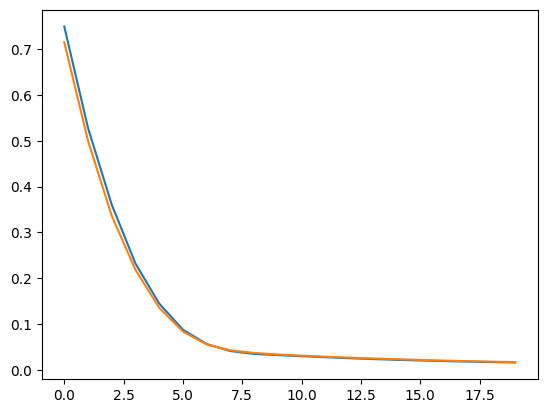

In [98]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])